<a href="https://colab.research.google.com/github/quotation3/project/blob/master/%ED%95%9C%EA%B5%AD%EC%9D%80%ED%96%89%EB%85%BC%EB%AC%B8%EA%B5%AC%ED%98%84_tone_rate%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84%EB%B6%84%EC%84%9D_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from datetime import datetime

In [95]:
tone = pd.read_csv('/content/drive/My Drive/Colab Notebooks/tone_doc.csv')
rate = pd.read_csv('/content/drive/My Drive/Colab Notebooks/policy_rate.csv')


#의사록 발행날짜와 금리 상관관계

In [96]:
# 데이터 전처리
rate = rate.drop([0,1,2,3])
tone.columns=['date','tone']
rate.columns=['date','rate']
tone['date'] = pd.to_datetime(tone['date'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')

In [97]:
# tone과 rate를 합침 (의사록 날짜만으로 비교)
tone_rate = pd.merge(tone,rate, on='date', how='inner')
tone_rate

,date,tone,rate
0,2005-05-12,-0.272727,3.25
1,2005-06-09,0.111111,3.25
2,2005-07-07,0.142857,3.25
3,2005-08-11,0.625000,3.25
4,2005-09-08,0.333333,3.25
...,...,...,...
156,2019-02-28,-0.500000,1.75
157,2019-04-18,0.076923,1.75
158,2019-05-31,0.000000,1.75
159,2019-07-18,-0.404255,1.50


In [98]:
tone_rate['date'] = pd.to_datetime(tone_rate['date'], format = "%Y-%m-%d")

In [99]:
# tone지수와 rate의 상관관계
corr = stats.pearsonr(tone_rate.tone, tone_rate.rate)
corr

(0.5088821801036697, 5.481453799703011e-12)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


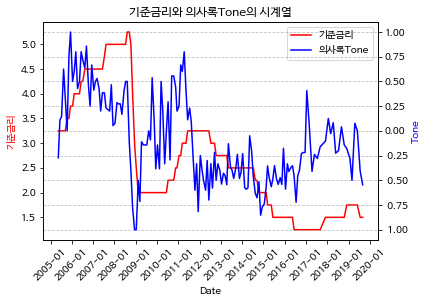

In [100]:
x = tone_rate['date']
y1 = tone_rate['rate']
y2 = tone_rate['tone']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
line1 = ax1.plot(x, y1, 'r-', label = '기준금리')
line2 = ax2.plot(x, y2, 'b-', label = '의사록Tone')

ax1.set_xlabel('Date')
ax1.set_ylabel('기준금리', color='r')
ax2.set_ylabel('Tone', color='b')

lns = line1+line2   # line 범례 작성
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=0)

# # x축 편집
plt.setp(ax1.get_xticklabels(), rotation=45)    # x축 45도 회전
loc = mdates.MonthLocator([1])  # x축 레이블 매년 1월만 표시
myFmt = mdates.DateFormatter('%Y-%m')   # x축 레이블 포맷 설정
ax1.xaxis.set_major_formatter(myFmt)
ax1.xaxis.set_major_locator(loc)

plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')   # x축 grid 표시
plt.title('기준금리와 의사록Tone의 시계열')

plt.show()

#의사록 발행날짜가 아닌 매 일 금리 상관관계

In [101]:
# 의사록 날짜가 아닌 모든날짜와 금리를 비교하기 위해 날짜리스트 새로 생성

# 중간중간 빈날짜를 채워줘야함.
from datetime import datetime, timedelta
# start_date부터 end_date까지 날짜 리스트 생성
start_date = datetime.strptime('2005-05-12', '%Y-%m-%d')
end_date = datetime.strptime('2019-08-30', '%Y-%m-%d')

str_date_list = []
while start_date.strftime('%Y%m%d') != end_date.strftime('%Y%m%d'): # start_date가 end_date랑 같아지기 전까지 1씩 늘어나면서 리스트에 추가
    str_date_list.append(start_date.strftime('%Y-%m-%d'))
    start_date += timedelta(days=1)
str_date_list.append(end_date.strftime('%Y-%m-%d')) # end_date 포함안됐으므로 따로 추가
    
date_list = np.array(str_date_list)
all_date  = pd.DataFrame(date_list.T, columns=['date'])
all_date

,date
0,2005-05-12
1,2005-05-13
2,2005-05-14
3,2005-05-15
4,2005-05-16
...,...
5219,2019-08-26
5220,2019-08-27
5221,2019-08-28
5222,2019-08-29


In [102]:
df = pd.merge(tone,all_date, on='date', how='outer') # 톤 데이터와 전체날짜를 date기준으로 outer 조인
tone_alldate = df.sort_values(by='date' ,ascending=True).fillna(method='ffill') # 내림차순으로 정렬후, 결측치는 가장 최근 과거 값으로 대입
tone_alldate

,date,tone
0,2005-05-12,-0.272727
161,2005-05-13,-0.272727
162,2005-05-14,-0.272727
163,2005-05-15,-0.272727
164,2005-05-16,-0.272727
...,...,...
5220,2019-08-26,-0.404255
5221,2019-08-27,-0.404255
5222,2019-08-28,-0.404255
5223,2019-08-29,-0.404255


In [103]:
# tone과 rate를 합침 (의사록 날짜만으로 비교)
tone_rate_alldate = pd.merge(tone_alldate,rate, on='date', how='inner')
tone_rate_alldate

,date,tone,rate
0,2005-05-12,-0.272727,3.25
1,2005-05-13,-0.272727,3.25
2,2005-05-14,-0.272727,3.25
3,2005-05-15,-0.272727,3.25
4,2005-05-16,-0.272727,3.25
...,...,...,...
5219,2019-08-26,-0.404255,1.50
5220,2019-08-27,-0.404255,1.50
5221,2019-08-28,-0.404255,1.50
5222,2019-08-29,-0.404255,1.50


In [104]:
tone_rate_alldate['date'] = pd.to_datetime(tone_rate_alldate['date'], format = "%Y-%m-%d")

In [105]:
# tone지수와 rate의 상관관계
corr = stats.pearsonr(tone_rate_alldate.tone, tone_rate_alldate.rate)
corr

(0.4860511400989789, 5.598383126065772e-308)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


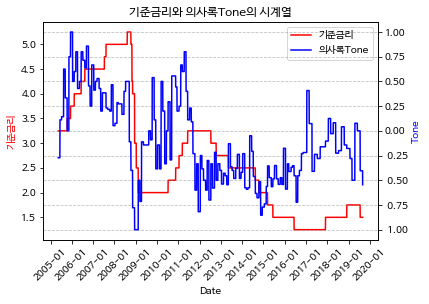

In [106]:
x = tone_rate_alldate['date']
y1 = tone_rate_alldate['rate']
y2 = tone_rate_alldate['tone']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
line1 = ax1.plot(x, y1, 'r-', label = '기준금리')
line2 = ax2.plot(x, y2, 'b-', label = '의사록Tone')

ax1.set_xlabel('Date')
ax1.set_ylabel('기준금리', color='r')
ax2.set_ylabel('Tone', color='b')

lns = line1+line2   # line 범례 작성
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=0)

# x축 편집
plt.setp(ax1.get_xticklabels(), rotation=45)    # x축 45도 회전
loc = mdates.MonthLocator([1])  # x축 레이블 매년 1월만 표시
myFmt = mdates.DateFormatter('%Y-%m')   # x축 레이블 포맷 설정
ax1.xaxis.set_major_formatter(myFmt)
ax1.xaxis.set_major_locator(loc)

plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')   # x축 grid 표시
plt.title('기준금리와 의사록Tone의 시계열')

plt.show()

한글이 깨질때

In [107]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [108]:
# import matplotlib.pyplot as plt
# plt.rc('font', family='NanumBarunGothic') 